# Assignment 2 CAP 6673
PCA + KPCA

In this assignment, I explored the power of Principal Component Analysis (PCA) and Kernel PCA for dimensionality reduction by applying them to image data.

---

*Matthew Acs*

# Dataset

In this assignment, I utilized two datasets: TrainData and TestData, both containing images of 40 individuals. This notebook will perform PCA and KPCA on the image data to reduce the dimensionality, which will be followed by a classification experiment.

The code cell below imports the general libraries necessary and loads the data. The data is then separated into the image data and labels.

In [ ]:
# import general libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA

# load training data
df_1 = pd.read_csv('TrainData.csv')
df_1_label = df_1.loc[:,"T_10305"]
df_1 = df_1.drop(columns = 'T_10305')

# load test data
df_2 = pd.read_csv('TestData.csv')
df_2_label = df_2.loc[:,"Label"]
df_2 = df_2.drop(columns = 'Label')

The cell below explores the first 5 datapoints of the training data.

In [ ]:
df_1.head()

,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,T_10,...,T_10295,T_10296,T_10297,T_10298,T_10299,T_10300,T_10301,T_10302,T_10303,T_10304
0,48,51,43,44,56,50,39,46,57,50,...,39,39,41,43,46,47,48,47,47,47
1,59,66,64,52,44,50,59,64,70,70,...,32,30,30,31,32,32,35,35,34,34
2,40,40,54,47,56,35,69,43,37,37,...,30,31,32,31,30,31,30,30,29,28
3,62,52,34,43,31,36,27,34,35,45,...,174,170,165,159,162,168,141,37,8,27
4,62,74,71,51,44,57,69,69,63,52,...,29,30,32,34,34,34,37,38,38,39


The next step is to convert the data, in pandas data frames, to numpy arrays, so that we may use them to complete PCA and KPCA from scratch and using Sklearn.

In [ ]:
## Convert the data frame to a numpy array
train_x = df_1.to_numpy()
train_y = df_1_label.to_numpy()

test_x = df_2.to_numpy()
test_y = df_2_label.to_numpy()

Below is one of the images in the training dataset displayed after converting it back from its flattened shape.

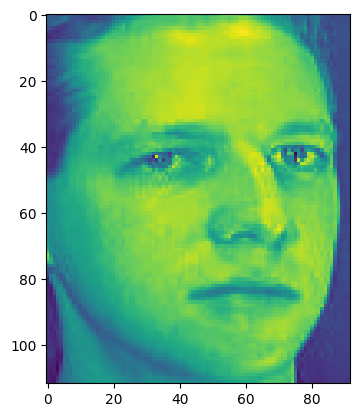

In [ ]:
plt.imshow(np.reshape(train_x[4], (112, 92)))

The size of the dataset is 200 samples each with 10304-pixel values (or attributes).

In [ ]:
print(np.shape(train_x))

(200, 10304)


Each label also has exactly five representative images in the dataset.

In [ ]:
label_counts = np.bincount(train_y)
print(label_counts)

[0 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5]




---



# Part 1: Principal Component Analysis (PCA)

Part 1 of this notebook will explore dimensionality reduction using PCA. PCA will be applied using numpy-based and Sklearn-based code.

## 1.1 Implement PCA from Scratch:

### a. Write Python code to implement PCA from scratch.

The first step to implement PCA from scratch is to create a PCA function. The function below centers the data, computes its covariance matrix, finds its eigenvalues and eigenvectors, sorts the eigenvectors in descending order with respect to their corresponding eigenvalues, and finally projects the data based on k components. The function also returns the eigenvalues and eigenvectors so that they may be used later and the process of computing them does not need to be repeated.

In [ ]:
def my_pca(Data,k):
  # Center the data
  data_centered = Data - np.mean(Data, axis=0)

  # Calculate the covariance matrix
  cov_matrix = np.cov(data_centered, rowvar=False)

  # Perform eigenvalue decomposition
  eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

  # Sort eigenvalues and eigenvectors in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  # Project the data onto the selected components
  data_pca_numpy = np.dot(eigenvectors[:, :k].T, data_centered.T).T

  return(data_pca_numpy.real, eigenvectors.real, eigenvalues.real)

### b. Apply your PCA implementation to the Train dataset to reduce the dimensionality of the images.

To apply the PCA implementation, I simply call the function and print the transformed data.

In [ ]:
pca_train_3, pca_train_eigenvector, pca_train_eigenvalues = my_pca(train_x, 3)
print(pca_train_3)

[[-1.36240472e+03 -1.41001500e+03  1.78687541e+03]
 [-2.90370161e+03 -1.13507676e+03 -3.13628798e+02]
 [-2.57225743e+03 -8.08304607e+02  7.95659059e+02]
 [-3.09043133e+03 -1.40629798e+03  3.90822041e+02]
 [-3.54602885e+03 -1.23685556e+03  5.53476211e+02]
 [ 2.85401407e+03 -8.31535772e+02 -3.32695881e+02]
 [ 2.69462883e+03 -1.32328466e+03  3.68338583e+02]
 [ 2.54383563e+03 -1.50251605e+03  7.64484208e+02]
 [ 2.30322993e+03 -1.42158410e+03  5.82286716e+02]
 [ 1.79163694e+03 -2.26330685e+03  1.18374089e+03]
 [ 1.01425781e+03  5.12050035e+02  1.34287573e+03]
 [ 6.75087808e+02  9.52497841e+02  7.26169061e+02]
 [ 2.26694958e+02  7.68756951e+02  1.24834578e+03]
 [-9.34339480e+02  1.37707163e+03  1.28524181e+03]
 [-7.82034589e+02  1.25163216e+03  1.32183743e+03]
 [-2.05191717e+03 -1.64077692e+03  3.48237508e+02]
 [-1.18553138e+03 -7.34245165e+02 -8.56473892e+02]
 [-1.34162227e+03 -3.35957352e+02 -1.16506842e+03]
 [-9.15988115e+02 -4.99259605e+02 -1.16290483e+03]
 [-8.47028206e+02 -9.21088308e+

Below, the transformed data is plotted in 3-dimensions. The color of each point represents the label associated with the point. As the plot shows, points tend to cluster is groups of 5 with points in a group having the same color. This shows that each class occupies a distinct region within the three-dimensional space, which indicates a degree of similarity between each datapoint and a good chance of classification success based on models such as a KNN.

The graph below also shows how PCA allows for visualization via dimensionality reduction. Without PCA, it would be impossible to visualize a 10304-dimensional space. PCA allows us to see how the data is distributed in a lower dimensional space.

In [ ]:
fig = px.scatter_3d(
      pca_train_3, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

###c. Choose an appropriate number of principal components to retain a significant amount of variance (e.g., 95%).

To see how many principal components to retain, I kept adding eigenvalues until the ratio of the sum of eigenvalues to the kth components to the sum of all eigenvalues was greater or equal to 0.95. This represents the number of components that retains a variance of at least 95%. The code below shows that it turns out that around 110 components are necessary for this occur. Reduction to 3 principal components simply doesn’t retain enough information for an accurate classifier, however, it may still be useful for visualization.

In [ ]:
## Find sum of eigenvalues
sum = np.sum(pca_train_eigenvalues)

variance = 0
component_number = 0

## Add components untill explained variance is at least 95%
for x in pca_train_eigenvalues:
  variance = x + variance
  component_number = component_number+1
  if (variance / sum) >= 0.95:
    break

## Output results
print("Variance " + str(variance / sum))
print("Number of components " + str(component_number))

Variance 0.950432571446594
Number of components 110


Finally, I transformed the original training data to 110 principal components using the eigenvectors obtained previously. This data is greatly reduced from its original dimensionality, but still retains a great deal of information.

In [ ]:
pca_train_data_centered = train_x - np.mean(train_x, axis=0)
pca_train_110 = np.dot(pca_train_eigenvector[:, :component_number].T, pca_train_data_centered.T).T
print(pca_train_110)

[[-1362.40471908 -1410.01500067  1786.8754089  ...   150.11133985
    104.67869886  -227.85254569]
 [-2903.70161117 -1135.07676178  -313.628798   ...    28.35171053
    245.51096308   -56.21974735]
 [-2572.25743345  -808.30460733   795.65905864 ...   -81.35025913
   -337.77601404  -150.22696891]
 ...
 [ 1292.41733442  -826.52299566  -421.53541979 ...    90.70276079
    -32.43882049    37.63505263]
 [ 1096.66971391 -1351.82682683  -257.26877143 ...  -129.08823955
   -142.0174865    -30.07607103]
 [ 1425.95118228 -1602.35752062  -185.81817133 ...    33.17066351
     -9.99205292   144.11871477]]


##1.2 PCA using scikit-learn:

Applying PCA using a library such as Sklearn is far simpler than doing it from scratch. The code below applies PCA and graphs the transformed data using Sklearn.

### a. Import the PCA module from sklearn.

In [ ]:
from sklearn.decomposition import PCA

###b. Apply PCA to the Train dataset using sklearn.

I defined a PCA function below that utilizes Sklearn. The core elements simply define the PCA parameters, then fit the PCA to the training data and transforms the data.

In [ ]:
def sklearn_pca(Data,k):
  pca = PCA(n_components=k)

  # Fit and transform the data using scikit-learn
  data_pca_sklearn = pca.fit_transform(Data)

  return(data_pca_sklearn)

The function is called below, and the transformed data is printed.

In [ ]:
pca_train_3_sk = sklearn_pca(train_x, 3)
print(pca_train_3_sk)

[[ 1.36240472e+03 -1.41001500e+03 -1.78687539e+03]
 [ 2.90370161e+03 -1.13507675e+03  3.13628694e+02]
 [ 2.57225743e+03 -8.08304607e+02 -7.95659562e+02]
 [ 3.09043133e+03 -1.40629798e+03 -3.90820568e+02]
 [ 3.54602885e+03 -1.23685554e+03 -5.53475337e+02]
 [-2.85401407e+03 -8.31535775e+02  3.32694726e+02]
 [-2.69462883e+03 -1.32328466e+03 -3.68338855e+02]
 [-2.54383563e+03 -1.50251604e+03 -7.64483745e+02]
 [-2.30322993e+03 -1.42158409e+03 -5.82286397e+02]
 [-1.79163694e+03 -2.26330685e+03 -1.18374076e+03]
 [-1.01425781e+03  5.12050040e+02 -1.34287757e+03]
 [-6.75087807e+02  9.52497848e+02 -7.26169636e+02]
 [-2.26694957e+02  7.68756955e+02 -1.24834693e+03]
 [ 9.34339481e+02  1.37707163e+03 -1.28524217e+03]
 [ 7.82034590e+02  1.25163216e+03 -1.32183758e+03]
 [ 2.05191717e+03 -1.64077692e+03 -3.48236732e+02]
 [ 1.18553138e+03 -7.34245173e+02  8.56474476e+02]
 [ 1.34162227e+03 -3.35957358e+02  1.16506880e+03]
 [ 9.15988115e+02 -4.99259614e+02  1.16290480e+03]
 [ 8.47028206e+02 -9.21088312e+

Just as above, the data is graphed. The same “grouping” pattern that was present in the previous graph is present here as well. Two graphs created from using the bespoke PCA is very similar to the one created using the sklearn PCA, showing that the two performed the same operations on the data. By inspecting the transformed data points above, you can see that this is true. The slight differences obtained are due to minor differences in the way sklearn handles the data, and the efficiency measures that sklearn uses. The PCA from scratch takes a significantly longer time to run due to this difference.

In [ ]:
fig = px.scatter_3d(
      pca_train_3_sk, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

Finally, an sklearn-based PCA is executed with 110 dimensions rather than 3.

In [ ]:
pca_train_110_sk = sklearn_pca(train_x, component_number)
print(pca_train_110_sk)

[[ 1362.40471908 -1410.01500068 -1786.87540854 ...   -96.09270676
     73.67973678   177.55444346]
 [ 2903.70161117 -1135.07676176   313.62879786 ...  -187.35039927
     56.61734607    97.90375323]
 [ 2572.25743346  -808.30460733  -795.6590586  ...   390.11140545
     64.89819612  -153.1554777 ]
 ...
 [-1292.41733442  -826.52299566   421.53541987 ...   116.27173771
   -102.08486047   208.68109392]
 [-1096.66971392 -1351.82682684   257.26877146 ...    36.25626889
    -33.69888415  -169.85670251]
 [-1425.95118228 -1602.3575206    185.81817141 ...    97.88020359
     21.27867389   -50.2485205 ]]


---

#Part 2: Kernel PCA (KPCA)



Kernel PCA uses the same idea as PCA; however, it transforms the data using a kernel function to allow separation of data that is not linearly separable. The KPCA code first computes and centers the kernel matrix before it preforms PCA in the same way as before. The kernel functions are defined in their respective sections in the code cells below.

In [ ]:
def my_kpca(data, n_components, kernel_type='rbf', kernel_param=1.0):

  # Compute the kernel matrix
  n_samples = data.shape[0]
  kernel_matrix = np.zeros((n_samples, n_samples))

  for i in range(n_samples):
      for j in range(n_samples):

          # Allows for three different options
          if kernel_type == 'rbf':
            kernel_matrix[i, j] = rbf_kernel(data[i], data[j], kernel_param)
          elif kernel_type == 'poly':
            kernel_matrix[i, j] = poly_kernel(data[i], data[j], kernel_param)
          elif kernel_type == 'linear':
            kernel_matrix[i, j] = linear_kernel(data[i], data[j])

  # Center the kernel matrix
  one_n = np.ones((n_samples, n_samples)) / n_samples
  centered_kernel_matrix = kernel_matrix - one_n.dot(kernel_matrix) - kernel_matrix.dot(one_n) + one_n.dot(kernel_matrix).dot(one_n)

  # Perform eigenvalue decomposition
  eigenvalues, eigenvectors = np.linalg.eigh(centered_kernel_matrix)

  # Sort eigenvalues and eigenvectors in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  # Project the data onto the selected components
  data_kpca_numpy = np.dot(centered_kernel_matrix, eigenvectors[:, :n_components])
  return(data_kpca_numpy, eigenvectors)

## 2.1 KPCA with RBF Kernel:

### a. Implement Kernel PCA with the Radial Basis Function (RBF) kernel from scratch.

Below is the Radial Basis Function kernel, which is defined mathematically in the return statement.

In [ ]:
def rbf_kernel(x, y, gamma=1.0):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

### b. Apply your KPCA implementation to the Train dataset.

KPCA is applied and the resulting transformed data is output.

In [ ]:
kpca_train_rbf, kpca_train_rbf_eigenvectors = my_kpca(train_x, 3, 'rbf', 1.0)
print(kpca_train_rbf)

[[-2.34009374e-18  1.53915821e-18 -1.89078037e-18]
 [-4.94993398e-02  3.48636452e-02 -1.00631918e-02]
 [-4.14861312e-02  3.65139023e-02  3.94963707e-04]
 [-9.44718604e-03  1.86550692e-02  8.87791204e-03]
 [ 3.01277640e-02  2.30413755e-02  2.41910680e-03]
 [ 2.77220755e-02  1.06780022e-01  4.01730826e-02]
 [-3.30818815e-02 -1.98786128e-02 -3.23954607e-02]
 [-2.94303636e-02 -5.49952542e-02  1.03677265e-01]
 [ 1.17919239e-02  3.25982470e-02  8.80034818e-03]
 [-1.79685855e-02  1.49266784e-03 -3.95945288e-04]
 [ 9.04378320e-03 -2.22200738e-02  1.90618496e-02]
 [ 2.30258532e-02 -6.17993304e-03  1.68019195e-02]
 [ 2.35194491e-02 -6.93767231e-02 -4.61476339e-02]
 [-8.09064235e-03 -5.76011107e-03 -1.04080563e-02]
 [ 4.83778306e-02  2.98299381e-03  6.22374970e-03]
 [-5.86363803e-02 -1.44964709e-02 -5.35321509e-02]
 [ 1.02912918e-02 -1.70349681e-02 -3.32701591e-03]
 [ 1.67882721e-02  8.53582518e-03 -1.71766851e-02]
 [-1.24098011e-01  3.33844881e-02 -5.34426006e-03]
 [-9.86092360e-02  7.57444563e-

The transformed data is then graphed.

In [ ]:
fig = px.scatter_3d(
      kpca_train_rbf, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

In [ ]:
kpca_train_rbf_110, kpca_train_rbf_eigenvectors = my_kpca(train_x, 110, 'rbf', 1.0)
print(kpca_train_rbf_110)

[[-2.34009374e-18  1.53915821e-18 -1.89078037e-18 ...  8.73375933e-19
  -4.00299885e-20 -1.36985913e-18]
 [-4.94993398e-02  3.48636452e-02 -1.00631918e-02 ...  1.78436343e-02
  -2.57646184e-02 -1.62635796e-02]
 [-4.14861312e-02  3.65139023e-02  3.94963707e-04 ...  1.18432098e-02
  -2.50737991e-02 -6.06877686e-04]
 ...
 [-9.39775070e-02 -5.43938569e-02  3.43547186e-02 ...  3.07622810e-02
   5.76424427e-02 -6.87508821e-03]
 [ 5.02257364e-03  3.19667009e-02  2.67249554e-03 ...  2.39261454e-03
  -4.02389482e-02  4.32499197e-03]
 [ 2.22185874e-02 -4.97922910e-02 -3.15809965e-02 ... -8.09343067e-03
  -6.76699041e-02  2.05917913e-02]]


### c. Apply KPCA to the Train dataset using sklearn.

The same process is repeated with Sklearn.

In [ ]:
# Create a KernelPCA object with rbf kernel
kpca = KernelPCA(kernel='rbf', gamma=1)

# Fit and transform the data using scikit-learn
data_kpca_sklearn = kpca.fit_transform(train_x)
data_kpca_sklearn = data_kpca_sklearn[:, :3]

print("Kernel PCA with Scikit-Learn:")
print(data_kpca_sklearn)

Kernel PCA with Scikit-Learn:
[[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-1.05697526e-03 -1.30807028e-02  2.13972854e-03]
 [ 4.19304228e-02 -2.60740374e-03 -4.23222145e-02]
 [ 1.91357833e-02  8.92848269e-03 -1.05479511e-02]
 [-5.81282683e-03 -1.27288992e-02  3.69552887e-03]
 [ 2.62978043e-02 -1.51657419e-02 -3.95195882e-02]
 [-6.24934835e-02 -1.41289976e-02  6.82546469e-04]
 [-8.78693661e-02  3.85309150e-03 -6.97950664e-02]
 [ 7.98345725e-03 -4.19596181e-02 -4.91969408e-02]
 [-3.48697650e-02 -2.65422753e-02 -1.25053968e-01]
 [-1.56316506e-02  2.76144273e-03 -9.59677540e-02]
 [-4.88638434e-02 -1.22139870e-02 -7.82334849e-02]
 [ 1.94629685e-02  7.39699032e-03 -1.06937837e-02]
 [ 3.63687774e-03  1.42511049e-04 -1.57068985e-02]
 [ 2.82887347e-02  8.52466295e-03 -2.22846702e-02]
 [-3.87600484e-02 -4.72524619e-02  6.48034052e-03]
 [-2.39178069e-02 -1.24595189e-02  4.54834513e-03]
 [-2.55768795e-02  2.17617548e-04 -1.56083662e-01]
 [-6.09110233e-02  5.60365281e-03 -1.06530495e-01]
 

In [ ]:
_fig = px.scatter_3d(
      data_kpca_sklearn, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

In [ ]:
# Create a KernelPCA object with rbf kernel
kpca = KernelPCA(kernel='rbf', gamma=1)

# Fit and transform the data using scikit-learn
data_kpca_sklearn = kpca.fit_transform(train_x)
data_kpca_sklearn = data_kpca_sklearn[:, :110]

print("Kernel PCA with Scikit-Learn:")
print(data_kpca_sklearn)

Kernel PCA with Scikit-Learn:
[[-0.         -0.         -0.         ...  0.          0.
  -0.        ]
 [-0.00105698 -0.0130807   0.00213973 ... -0.00706482  0.01682846
  -0.01155612]
 [ 0.04193042 -0.0026074  -0.04232221 ... -0.0115309   0.04235632
  -0.00044528]
 ...
 [ 0.12330415  0.0217585  -0.03596703 ...  0.04497619 -0.03460889
   0.00218428]
 [-0.00651637  0.02179808 -0.00880499 ... -0.03285374 -0.01500249
   0.0233804 ]
 [ 0.01453726  0.00326581  0.0053471  ...  0.0290346  -0.01021855
  -0.0057614 ]]


The following two iterations of this process simply change the kernel type of poly (degree 2) and linear.

##2.2 KPCA with Polynomial Kernel:

###a. Implement Kernel PCA with a Polynomial kernel from scratch.

In [ ]:
def poly_kernel(x, y, degree=2):
    return ((np.dot(x.T, y))**degree)

###b. Apply your KPCA implementation to the Train dataset.



In [ ]:
kpca_train_poly, kpca_train_poly_eigenvectors = my_kpca(train_x, 3, 'poly', 2)
print(kpca_train_poly)

[[-2.24746578e+16  5.25302650e+15  9.68096983e+15]
 [-4.46477598e+16  1.58636826e+15 -1.10924372e+15]
 [-3.14863524e+16 -2.12781757e+15  4.62665747e+15]
 [-4.08328115e+16  1.13429707e+15  1.80366150e+15]
 [-4.57449609e+16 -1.62980464e+15  3.07584065e+15]
 [ 2.35543921e+16  8.49181365e+15 -7.67581785e+14]
 [ 2.05925699e+16  1.07763040e+16  2.00375097e+15]
 [ 1.84370042e+16  1.17008604e+16  3.48245524e+15]
 [ 1.59897912e+16  1.14654687e+16  2.76575787e+15]
 [ 6.42432597e+15  1.65849994e+16  6.26857483e+15]
 [ 1.24655924e+16 -1.04249848e+15  5.64453225e+15]
 [ 1.11827962e+16 -3.86087396e+15  3.04351497e+15]
 [ 6.59853343e+15 -4.05897359e+15  5.37921502e+15]
 [-5.00069638e+14 -1.03864501e+16  5.57430989e+15]
 [ 3.94734037e+14 -9.30777702e+15  5.77000569e+15]
 [-2.78166727e+16  4.22342808e+15  2.14213341e+15]
 [-9.50563476e+15  8.04815272e+13 -3.97385179e+15]
 [-9.73804024e+15 -2.31313199e+15 -5.48113455e+15]
 [-6.45779455e+15 -3.86733394e+14 -5.13269238e+15]
 [-7.45163395e+15  2.09164244e+

In [ ]:
fig = px.scatter_3d(
      kpca_train_poly, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

In [ ]:
kpca_train_poly_110, kpca_train_poly_eigenvectors = my_kpca(train_x, 110, 'poly', 2)
print(kpca_train_poly_110)

[[-2.24746578e+16  5.25302650e+15  9.68096983e+15 ...  6.47832183e+13
   3.13455165e+12 -2.03642512e+14]
 [-4.46477598e+16  1.58636826e+15 -1.10924372e+15 ...  1.09938931e+14
  -2.97138708e+13  8.76066923e+13]
 [-3.14863524e+16 -2.12781757e+15  4.62665747e+15 ... -1.08179093e+13
  -4.71674155e+13  4.51874997e+13]
 ...
 [ 8.59729551e+15  7.63778757e+15 -1.48916001e+15 ... -2.48843520e+13
  -2.48255224e+13 -1.74016733e+13]
 [ 3.55679165e+15  1.08514584e+16 -7.11985396e+14 ...  5.13980196e+13
   9.25170015e+12  8.11499469e+13]
 [ 5.92925058e+15  1.27785638e+16 -4.79491878e+14 ... -9.69388598e+13
   1.83881540e+13 -5.40195256e+13]]


### c. Apply KPCA to the Train dataset using sklearn.

In [ ]:
# Create a KernelPCA object with the desired kernel and number of components
kpca = KernelPCA(kernel='poly', degree=2, n_components=3)

# Fit and transform the data using scikit-learn
data_kpca_sklearn = kpca.fit_transform(train_x)

print("Kernel PCA with Scikit-Learn:")
print(data_kpca_sklearn)

Kernel PCA with Scikit-Learn:
[[ 4.32522902e+03  1.41163328e+03 -3.54998495e+03]
 [ 8.59241496e+03  4.26367062e+02  4.06770397e+02]
 [ 6.05956634e+03 -5.71699533e+02 -1.69657922e+03]
 [ 7.85827837e+03  3.04893628e+02 -6.61412079e+02]
 [ 8.80362553e+03 -4.37845645e+02 -1.12790785e+03]
 [-4.53310781e+03  2.28191569e+03  2.81488597e+02]
 [-3.96310571e+03  2.89580756e+03 -7.34773649e+02]
 [-3.54826660e+03  3.14425333e+03 -1.27702366e+03]
 [-3.07729914e+03  3.08099127e+03 -1.01420580e+03]
 [-1.23643859e+03  4.45669965e+03 -2.29867248e+03]
 [-2.39901477e+03 -2.80159208e+02 -2.06986685e+03]
 [-2.15212593e+03 -1.03751514e+03 -1.11606452e+03]
 [-1.26987537e+03 -1.09073708e+03 -1.97257038e+03]
 [ 9.62939038e+01 -2.79103521e+03 -2.04411226e+03]
 [-7.59163515e+01 -2.50117739e+03 -2.11587354e+03]
 [ 5.35332824e+03  1.13497957e+03 -7.85515377e+02]
 [ 1.82941150e+03  2.16602998e+01  1.45720741e+03]
 [ 1.87414368e+03 -6.21551910e+02  2.00992796e+03]
 [ 1.24284841e+03 -1.03898693e+02  1.88216250e+03]
 

In [ ]:
fig = px.scatter_3d(
      data_kpca_sklearn, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

In [ ]:
# Create a KernelPCA object with the desired kernel and number of components
kpca = KernelPCA(kernel='poly', degree=2, n_components=110)

# Fit and transform the data using scikit-learn
data_kpca_sklearn = kpca.fit_transform(train_x)

print("Kernel PCA with Scikit-Learn:")
print(data_kpca_sklearn)

Kernel PCA with Scikit-Learn:
[[ 4325.22902004  1411.6332784  -3549.98495454 ...   195.70190637
      9.59182957  -624.59334448]
 [ 8592.41495733   426.36706189   406.77039664 ...   332.34959473
    -90.29542022   268.64895666]
 [ 6059.56633666  -571.69953305 -1696.57922416 ...   -32.72914664
   -143.29101445   138.53488783]
 ...
 [-1654.59014761  2052.40223301   546.08733462 ...   -75.15671945
    -75.39694478   -53.25263767]
 [ -684.55714234  2915.97518941   261.09725223 ...   155.26080171
     28.03266247   248.90695934]
 [-1141.14445983  3433.82485123   175.83890717 ...  -293.0003207
     55.89051359  -165.69008904]]


##2.3 KPCA with linear Kernel:

###a. Implement Kernel PCA with a Polynomial kernel from scratch.

In [ ]:
def linear_kernel(x, y):
    return np.dot(x.T, y)

###b. Apply your KPCA implementation to the Train dataset.

In [ ]:
kpca_train_linear, kpca_train_linear_eigenvectors = my_kpca(train_x, 3, 'linear')
print(kpca_train_linear)

[[-3.37018759e+07  2.84850920e+07  2.72727677e+07]
 [-7.18290167e+07  2.29307957e+07 -4.78686164e+06]
 [-6.36300650e+07  1.63293519e+07  1.21440054e+07]
 [-7.64481593e+07  2.84100007e+07  5.96504865e+06]
 [-8.77182988e+07  2.49869287e+07  8.44761088e+06]
 [ 7.05998935e+07  1.67986673e+07 -5.07787921e+06]
 [ 6.66571725e+07  2.67329676e+07  5.62188755e+06]
 [ 6.29269934e+07  3.03537961e+07  1.16681891e+07]
 [ 5.69751177e+07  2.87188106e+07  8.88734059e+06]
 [ 4.43198156e+07  4.57232752e+07  1.80672308e+07]
 [ 2.50897479e+07 -1.03444235e+07  2.04960781e+07]
 [ 1.66996820e+07 -1.92423404e+07  1.10833917e+07]
 [ 5.60776488e+06 -1.55304110e+07  1.90532839e+07]
 [-2.31128040e+07 -2.78195708e+07  1.96164216e+07]
 [-1.93452300e+07 -2.52854453e+07  2.01749741e+07]
 [-5.07583810e+07  3.31469391e+07  5.31508835e+06]
 [-2.93265511e+07  1.48332046e+07 -1.30722116e+07]
 [-3.31877795e+07  6.78700301e+06 -1.77822362e+07]
 [-2.26588453e+07  1.00860315e+07 -1.77492136e+07]
 [-2.09529805e+07  1.86078057e+

In [ ]:
fig = px.scatter_3d(
      kpca_train_linear, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

In [ ]:
kpca_train_linear, kpca_train_linear_eigenvectors = my_kpca(train_x, 110, 'linear')
print(kpca_train_linear)

[[-3.37018759e+07  2.84850920e+07  2.72727677e+07 ... -2.66435334e+05
  -1.84138146e+05  3.97982695e+05]
 [-7.18290167e+07  2.29307957e+07 -4.78686164e+06 ... -5.03219641e+04
  -4.31873285e+05  9.81972200e+04]
 [-6.36300650e+07  1.63293519e+07  1.21440054e+07 ...  1.44390047e+05
   5.94174839e+05  2.62396603e+05]
 ...
 [ 3.19705943e+07  1.66973993e+07 -6.43382159e+06 ... -1.60989972e+05
   5.70624619e+04 -6.57359329e+04]
 [ 2.71283753e+07  2.73095758e+07 -3.92664839e+06 ...  2.29121053e+05
   2.49820039e+05  5.25329035e+04]
 [ 3.52738280e+07  3.23707913e+07 -2.83611034e+06 ... -5.88752110e+04
   1.75768148e+04 -2.51727512e+05]]


### c. Apply KPCA to the Train dataset using sklearn.

In [ ]:
# Create a KernelPCA object with the desired kernel and number of components
kpca = KernelPCA(kernel='linear', n_components=3)

# Fit and transform the data using scikit-learn
data_kpca_sklearn = kpca.fit_transform(train_x)

print("Kernel PCA with Scikit-Learn:")
print(data_kpca_sklearn)

Kernel PCA with Scikit-Learn:
[[ 1.36240472e+03 -1.41001500e+03 -1.78687541e+03]
 [ 2.90370161e+03 -1.13507676e+03  3.13628798e+02]
 [ 2.57225743e+03 -8.08304607e+02 -7.95659059e+02]
 [ 3.09043133e+03 -1.40629798e+03 -3.90822041e+02]
 [ 3.54602885e+03 -1.23685556e+03 -5.53476211e+02]
 [-2.85401407e+03 -8.31535772e+02  3.32695881e+02]
 [-2.69462883e+03 -1.32328466e+03 -3.68338583e+02]
 [-2.54383563e+03 -1.50251605e+03 -7.64484208e+02]
 [-2.30322993e+03 -1.42158410e+03 -5.82286716e+02]
 [-1.79163694e+03 -2.26330685e+03 -1.18374089e+03]
 [-1.01425781e+03  5.12050035e+02 -1.34287573e+03]
 [-6.75087808e+02  9.52497841e+02 -7.26169061e+02]
 [-2.26694958e+02  7.68756951e+02 -1.24834578e+03]
 [ 9.34339480e+02  1.37707163e+03 -1.28524181e+03]
 [ 7.82034589e+02  1.25163216e+03 -1.32183743e+03]
 [ 2.05191717e+03 -1.64077692e+03 -3.48237508e+02]
 [ 1.18553138e+03 -7.34245165e+02  8.56473892e+02]
 [ 1.34162227e+03 -3.35957352e+02  1.16506842e+03]
 [ 9.15988115e+02 -4.99259605e+02  1.16290483e+03]
 

In [ ]:
fig = px.scatter_3d(
      data_kpca_sklearn, x=0, y=1, z=2, color=train_y,
      labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
  )
fig.show()

In [ ]:
# Create a KernelPCA object with the desired kernel and number of components
kpca = KernelPCA(kernel='linear', n_components=110)

# Fit and transform the data using scikit-learn
data_kpca_sklearn = kpca.fit_transform(train_x)

print("Kernel PCA with Scikit-Learn:")
print(data_kpca_sklearn)

Kernel PCA with Scikit-Learn:
[[ 1362.40471908 -1410.01500067 -1786.8754089  ...  -150.11133984
   -104.67869886   227.85254569]
 [ 2903.70161117 -1135.07676178   313.628798   ...   -28.35171053
   -245.51096308    56.21974735]
 [ 2572.25743345  -808.30460733  -795.65905864 ...    81.35025913
    337.77601404   150.22696891]
 ...
 [-1292.41733442  -826.52299566   421.53541979 ...   -90.70276079
     32.43882049   -37.63505263]
 [-1096.66971391 -1351.82682683   257.26877143 ...   129.08823955
    142.0174865     30.07607103]
 [-1425.95118228 -1602.35752062   185.81817133 ...   -33.17066351
      9.99205292  -144.11871477]]


#Part 3: Testing and Evaluation

##3.1 Applying PCA and KPCA to the Test Dataset:

The first step to testing the PCA and KPCA in a classification experiment is to train the PCA and KPCAs on the training data and then project the testing data. The following code does this using the PCA and KPCA models (rbf and poly) built from scratch, with 110 components being retained.

###a. Use the PCA and KPCA models (both RBF and Polynomial) trained on the Train dataset to transform the Test dataset.

In [ ]:
pca_test_data_centered = test_x - np.mean(test_x, axis=0)
test_data_pca = np.dot(pca_test_data_centered, pca_train_eigenvector[:, :component_number])
print(test_data_pca)

[[-2646.45465876 -1061.46659057  1057.59508674 ...  -159.90103997
    -14.3673851    -34.49274397]
 [-2562.42024767  -982.3651124    158.63246564 ...    55.41757265
     94.01650066   125.19168299]
 [-2395.85244385  -694.7917804   1047.11967803 ...  -124.95570397
    -68.16888119    10.71168832]
 ...
 [  918.23727285  -703.4178647  -1292.8119478  ...   -18.23498103
   -127.97590135    34.93920812]
 [  844.42589368 -1323.18695901  -789.65202154 ...     4.43809156
   -103.85975152    52.82745706]
 [ 1377.52242952 -1353.13378391  -544.50666228 ...   -20.50214154
     86.54804743   -48.5163899 ]]


In [ ]:
n_samples = test_x.shape[0]
kernel_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        kernel_matrix[i, j] = rbf_kernel(test_x[i], test_x[j], 1)

# Center the kernel matrix
one_n = np.ones((n_samples, n_samples)) / n_samples
centered_kernel_matrix = kernel_matrix - one_n.dot(kernel_matrix) - kernel_matrix.dot(one_n) + one_n.dot(kernel_matrix).dot(one_n)

test_data_kpca_rbf = np.dot(centered_kernel_matrix, kpca_train_rbf_eigenvectors[:, :component_number])
print(test_data_kpca_rbf)

[[-2.34009374e-18  1.53915821e-18 -1.89078037e-18 ...  8.73375933e-19
  -4.00299885e-20 -1.36985913e-18]
 [-4.94993398e-02  3.48636452e-02 -1.00631918e-02 ...  1.78436343e-02
  -2.57646184e-02 -1.62635796e-02]
 [-4.14861312e-02  3.65139023e-02  3.94963707e-04 ...  1.18432098e-02
  -2.50737991e-02 -6.06877686e-04]
 ...
 [-9.39775070e-02 -5.43938569e-02  3.43547186e-02 ...  3.07622810e-02
   5.76424427e-02 -6.87508821e-03]
 [ 5.02257364e-03  3.19667009e-02  2.67249554e-03 ...  2.39261454e-03
  -4.02389482e-02  4.32499197e-03]
 [ 2.22185874e-02 -4.97922910e-02 -3.15809965e-02 ... -8.09343067e-03
  -6.76699041e-02  2.05917913e-02]]


In [ ]:
n_samples = test_x.shape[0]
kernel_matrix = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in range(n_samples):
        kernel_matrix[i, j] = poly_kernel(test_x[i], test_x[j], 2)

# Center the kernel matrix
one_n = np.ones((n_samples, n_samples)) / n_samples
centered_kernel_matrix = kernel_matrix - one_n.dot(kernel_matrix) - kernel_matrix.dot(one_n) + one_n.dot(kernel_matrix).dot(one_n)

test_data_kpca_poly = np.dot(centered_kernel_matrix, kpca_train_poly_eigenvectors[:, :component_number])
print(test_data_kpca_poly)

[[-2.62098493e+16  3.27101350e+15 -2.50488551e+15 ...  7.90155713e+14
  -9.27255678e+13 -2.31883994e+15]
 [-3.12862277e+16  9.07043164e+15 -6.36619443e+15 ...  2.22527279e+15
  -6.94349741e+14  4.73860431e+14]
 [-2.71766355e+16  4.55675350e+15 -8.74864874e+14 ...  1.37100154e+15
  -3.79849420e+14 -5.76352862e+13]
 ...
 [ 3.40249565e+15  6.18675678e+15 -3.12940633e+15 ... -2.49488505e+14
  -2.51902210e+14  5.02496580e+14]
 [ 8.79532587e+14  8.28522291e+15 -2.36345491e+15 ... -5.84084538e+14
  -1.68938136e+14  5.23865045e+14]
 [ 4.75901154e+15  8.52979399e+15 -1.02790873e+15 ... -1.07401744e+15
  -6.91784224e+13 -3.17396411e+13]]


###b. Ensure that the dimensionality reduction is consistent with the training data.



The shape of the transformed data shows that the dimensionality was reduced to 110 components, which is the same number as I determined to retain at least 95% variance earlier.

In [ ]:
print(np.shape(test_data_pca))
print(np.shape(test_data_kpca_rbf))
print(np.shape(test_data_kpca_poly))

(200, 110)
(200, 110)
(200, 110)


##3.2 Classification Experiment:



###a. Choose a minimum distance classifier to classify the  TestDataset .



The classifier below classifies test data by finding the closest training datapoint to it and assigning the test data the same label. This is known as a minimum distance classifier, which is a special case of a KNN classifier where k=1.

In [ ]:
# Function to calculate distance between two points
def dis(x1, x2):
    return np.linalg.norm(x1 - x2)

# Function to perform classification using minimum distance
def myclassifier(Train, Trainlabel, Test):
    pred = []

    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint, trainpoint))

        # Since there are 5 labels per class in ascending order
        # (e.g. train_y[0] = class 1)
        pred.append(np.ceil((np.argmin(pred_dis)+1)/5))

    return np.array(pred)

In [ ]:
def calculate_accuracy(true_labels, predicted_labels):

    #If the difference is not zero, the predicion is wrong
    difference = predicted_labels - true_labels
    correct_predictions = 0
    for x in difference:
      if x == 0:
        correct_predictions = correct_predictions + 1

    accuracy = correct_predictions / len(true_labels)

    return accuracy

### b. Evaluate the classification performance on the Test dataset using accuracy metrics.



Finally, the code below creates predictions using the classifier and prints the predictions and accuracy of the classifier on the test data.

No PCA or KPCA applied

In [ ]:
predictions = myclassifier(train_x, train_y, test_x)
print("Predictions:")
print(predictions)

accuracy = calculate_accuracy(test_y, predictions)

print("Accuracy:")
print("")
print(accuracy)

Predictions:
[ 1.  1.  1.  1.  1. 32.  2.  2.  2.  2.  3.  3.  3.  7.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6. 15.  7.  7.  7.  7.  7.  8.
  8.  8.  1.  8. 30. 30. 17.  9.  9. 10. 10. 10. 10. 10. 11. 11. 11. 11.
  7. 12. 12. 12. 12. 12. 13. 13. 13. 32. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 20.  9.  9.  9. 20. 21. 21. 21. 31. 21. 22. 22. 22.
 22. 22. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 12. 26. 26. 27. 27. 27. 27. 27. 28. 28. 28. 28. 28. 29. 29. 29. 29.
 29.  9. 17. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 32. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 36. 36. 35. 35. 35. 35. 36. 36. 36. 36.
 37. 37. 37. 37. 37. 38. 38. 38. 38. 38. 39. 39. 39. 39. 39. 40. 40. 40.
 40. 40.]
Accuracy:

0.905


PCA

In [ ]:
predictions = myclassifier(pca_train_110, train_y, test_data_pca)
print("Predictions:")
print(predictions)

accuracy = calculate_accuracy(test_y, predictions)

print("Accuracy:")
print("")
print(accuracy)

Predictions:
[ 1.  1.  1.  1.  1. 32.  2.  2.  2. 32.  3.  3.  3.  7.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6. 15.  7.  7.  7.  7.  7.  8.
  8.  8. 20.  8. 30. 30. 17.  9.  9. 10. 10. 10. 10. 10. 11. 11. 11. 11.
  7. 12. 12. 12. 12. 12. 13. 13. 13. 32. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 20.  9.  9. 20. 20. 21. 21. 21. 31. 21. 22. 22. 22.
 22. 22. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 25. 25. 14. 25. 25. 26.
 26. 12. 26. 26. 27. 27. 27. 27. 27. 28. 28. 28. 28. 28. 29. 29. 29. 29.
 29.  9. 17. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 32. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 35. 36. 35. 35. 35. 35. 36. 36. 36. 36.
 37. 37. 37. 37. 37. 38. 38. 38. 38. 38. 39. 39. 39. 39. 39. 40. 40. 16.
 40. 40.]
Accuracy:

0.9


KPCA RBF

In [ ]:
predictions = myclassifier(kpca_train_rbf_110, train_y, test_data_kpca_rbf)
print("Predictions:")
print(predictions)

accuracy = calculate_accuracy(test_y, predictions)

print("Accuracy:")
print("")
print(accuracy)

Predictions:
[ 1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  4.  4.  4.
  4.  4.  5.  5.  5.  5.  5.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  9.  9.  9.  9.  9. 10. 10. 10. 10. 10. 11. 11. 11. 11.
 11. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 18. 18. 18. 18. 18.
 19. 19. 19. 19. 19. 20. 20. 20. 20. 20. 21. 21. 21. 21. 21. 22. 22. 22.
 22. 22. 23. 23. 23. 23. 23. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 27. 27. 27. 27. 27. 28. 28. 28. 28. 28. 29. 29. 29. 29.
 29. 30. 30. 30. 30. 30. 31. 31. 31. 31. 31. 32. 32. 32. 32. 32. 33. 33.
 33. 33. 33. 34. 34. 34. 34. 34. 35. 35. 35. 35. 35. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 37. 38. 38. 38. 38. 38. 39. 39. 39. 39. 39. 40. 40. 40.
 40. 40.]
Accuracy:

1.0


KPCA Poly

In [ ]:
predictions = myclassifier(kpca_train_poly_110, train_y, test_data_kpca_poly)
print("Predictions:")
print(predictions)

accuracy = calculate_accuracy(test_y, predictions)

print("Accuracy:")
print("")
print(accuracy)

Predictions:
[ 5. 36.  1.  5. 10. 34.  2.  2.  2. 30.  3.  3.  3.  3.  3.  4. 19.  4.
 36. 36.  5.  5.  5.  5.  5. 31. 31. 31. 31. 31.  7.  7.  7.  7.  7.  8.
 12.  8.  8.  8.  9.  9.  9.  9.  9. 36. 10. 10. 10. 10. 11. 11. 11. 11.
 12. 12. 12. 12. 12. 12. 27. 13. 38. 14. 13. 14. 14. 14. 14. 14. 15. 15.
 15. 15. 15.  9. 16. 40. 40. 40. 17. 17. 17. 17. 17. 18. 18. 18. 36. 18.
 19. 19. 19. 19. 19. 20. 12.  3. 12. 12. 21. 21. 21. 21. 21. 15. 13. 22.
 22. 15. 23. 18. 23. 23. 23. 24. 24. 27. 27. 24. 25. 25. 14. 25. 14. 12.
 12. 12. 26. 26. 15. 27. 27. 27. 27. 28. 28. 28. 28. 28. 35. 36. 18. 18.
 29. 12. 12.  9. 38.  9. 31. 31. 31. 31. 31. 14. 32. 32. 32.  9. 15. 15.
 15. 15. 15. 34. 18. 34. 34. 34. 35. 35. 36. 35. 36. 36. 36. 36. 36. 36.
 37. 37. 37. 37. 37. 23. 38. 38. 38. 38. 39. 39. 39. 39. 39. 23. 40. 40.
 40. 40.]
Accuracy:

0.69


#Conclusions

Overall, the notebook showed that PCA and KPCA can be used to reduce the dimensionality of a data set. The original image data was high dimensional and thus difficult to visualize. By using PCA and KPCA, the data was reduced to three dimensions so that it could be plotted and visualized. The graphs showed that the classes were found in localized regions, demonstrating a degree of similarity between the images within a class and the likelihood of successful class separation during classification. To retain 95% variance, the data was transformed to 100 dimensions, which is a large reduction from the original 10304 dimensions. A significant reduction of dimensionality makes data much easier to work with. KPCA also allows the nonlinear separation of classes while reducing dimensionality. In this case, the rbf kernel KPCA was the most effective at separating the data, as highlighted by the 100 percent accuracy on the test data.



The classification results show that if a minimum distance classifier is used without any PCA, the baseline accuracy is 90.5%. The classifier with PCA caused the accuracy to decrease to 90%. This makes sense because some information was lost as the original dimensionality was reduced to 110 principal components. However, this makes for a more computationally efficient classifier. On the other hand, the rbf KPCA had 100% classification accuracy, which suggests that the relationship present in the data is gaussian. The KPCA allowed the data to be separated as well as the dimensionality to be reduced. Finally, the poly KPCA accuracy was 69%, which suggests that the data does not follow a quadratic relationship (degree used was 2). Clearly, the rbf KPCA was highly effective in both dimensionality reduction and classification.



Finally, implementing KPCA and PCA from scratch offers more control over sklearn. It allows you to change any of the details that you like with the implementation. However, Sklearn allows you to run a PCA very simply and quickly on your data. You can rapidly experiment with running different kernels and changing hyperparameters. Sklearn PCA and KPCA objects also provide a number of features that are more complex than one would typically include in a scratch built KPCA or PCA function. Sklearn also utilizes algorithmic differences that make their library functions computational more efficient. This means that code using Sklearn will run significantly faster than most built from scratch implementations. This was true in this notebook, where the PCA takes over 10 minutes to execute while the sklearn version takes a few seconds. While implementing these methods from scratch gives you a deeper understanding of how these techniques work, library such as Sklearn are more practical for production.


#Extra 2 points:



##Compute the covariance matrix of the label attribute in the TrainData and print it.

The covariance matrix of a single attribute is simply the variance of that attribute. The code below finds the variance (covariance matrix) of the label attribute in TrainData and prints it.

In [ ]:
label_cov_matrix = np.cov(train_y, rowvar=False)

# Print the covariance matrix
print("Covariance Matrix of the Label Attribute:")
print(label_cov_matrix)

Covariance Matrix of the Label Attribute:
133.91959798994975
